__[References]__

- http://research.sualab.com/introduction/practice/2019/05/08/generative-adversarial-network.html
- https://laonple.blog.me/221201915691
- https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

# 1. Journal Review (1)

<span class="girk">Unsupervised Representation Learning with DEEP Convolutinal Generative Adversarial Networks, ICLR 2016</span>

- Original GAN은 MNIST와 같이 단순한 이미지는 괜찮은 이미지를 생성했지만, CIFAR-10 같은 <span class="mark">복잡한 영상에서는 좋은 영상을 만들어내지 못함</span>.
- 또한 <span class="mark">학습시 안정성이 떨어지는</span> 심각한 문제가 있어 이 문제를 해결하고자 함.
- 입력 데이터인 <span class="mark">random vector 또는 input noise에 대한 의미를 발견</span>
  - Generator 입력으로 들어가는 $z$를 살짝 바꾸면 생성 이미지가 살짝 변하게 되는 Vector arithmetic의 개념을 찾아냄

## 1.1. Introduction

- Gan의 학습 불안정해서, 종종 Generator가 이상한 아웃풋을 만들어낸다.
- Contribution
  - Convolutional GAN의 아키텍처를 사용해, <span class="mark">대부분 환경에서 학습을 안정</span>하게 하는.
  - 학습된 discriminator를 <span class="mark">image classification task</span>에 사용함 -> 다른 unsupervised 알고리즘과 견줄만한 성능을 보임
  - GAN으로 학습된 <span class="mark">filter들을 시각화</span> -> 특정 필터들은 특정 사물을 묘사할 수 있게끔 학습되었다는 것을 보임
  - Generator가 i<span class="mark">nteresting vector arithmetic properties</span>를 갖음을 보임

## 1.2. Related work

### 1.2.1. Representation learning from unlabeled data

- Unsupervised의 <span class="mark">representation learning</span>은 컴퓨터 비전에서 꽤 잘 연구된 분야.
- Conventional approach는 K-means와 같은 클러스터링의 방법,
- 다른 유명한 방법은 autoencoder(Convolutioanl AE, Stacked AE 등)를 학습,
  - compact code로 인코딩하고, 그 code를 이미지 복원을 최대한 가깝게 하는 식으로 학습

### 1.2.2. Generating natural images

- <span class="mark">이미지를 생성하는 모델</span>도 잘 연구된 분야이며, 2가지 카테고리로 나뉨
  - Parametric,
  - Non-parametric
- Non-parametric 모델은 주로, 이미 존재하는 이미지나 이미지 patches를 matching하는 (비교적 옛날 연구)
  - Texture synthesis, Super-resolution, In-painting 등에 사용됨
- Parametric 모델은 MNIST와 같은 이미지들에는 광범위하게 연구되었지만, <span class="mark">real-world의 natural 이미지를 생성</span>하는 것은 성공적이지 못했음.
  - Variational sampling approach : 괜찮았지만, 샘플들이 blurry해지는 단점
  - Origianl GAN : noisy하고 incomprehensible한 이미지를 생성해내는 단점
  - Laplacian pytramid extension : 사물들이 Wobbly하게 보이는 단점(조금 떨려보이는)
  - 그외 RNN이나 deconvolution network approach 등
  
### 1.2.3. Visualizing the internals of CNNs

- neural nets를 사용하는 비평들은 주로 이게 블랙박스 모델이라는 것 ; <span class="mark">little understaing of what the networks do</span>
- deconvolution과 filtering the maximal activation을 사용해서, 네트워크에서 각각의 컨볼류션 필터들의 목적을 찾아낸 연구도 있었음(근사)
- 비슷하게, 인풋에다가 gradient descent를 해서, 특정 필터에 반응하는 ideal 이미지를 찾는 연구도 있었음

## 1.3. Apprach and Model Architecture


- supervised learning에 종종 쓰이는 CNN 아키텍처를 GAN에 접목시킬 때 어려움이 있었지만, 
- 연구 끝에 학습의 안정성과 생성 이미지의 고퀄리티를 내는 아키텍처를 찾았음

![image](https://user-images.githubusercontent.com/48466625/65010917-7a0e2500-d94c-11e9-806c-08b6716904f6.png)

![image](https://user-images.githubusercontent.com/48466625/65011098-37008180-d94d-11e9-9f37-25a8e840c992.png)
- 해당 연구는 최근 CNN 아키텍처에서 주요한 세가지 변화를 모티브했음.
  - maxpooling과 같은 spatial pooling function을 <span class="mark">strided convolution</span>으로 대체했던, <span class="mark">for allowing network to learn its own spatial downsampling.</span>
  - 두번째 트렌드는 <span class="mark">fully connect layer을 삭제</span>하는 시도들, (e.g. global average pooling)
    - 본 논문은 Global average pooling이 모델 안정성은 높이나, 수렴 속도는 늦추는 것을 찾아냈다.
  - <span class="mark">Batch normalization</span> : each unit에서 인풋을 zero mean and unit variance로 normalize하면서 학습을 안정화 함.
    - 모든 레이어에 배치놈을 하면 모델이 불안정해지고 sample oscillation이 일어남
    - generator의 아웃풋 레이어, discriminator의 인풋 레이어에는 batchnorm을 안함.
  - <span class="mark">ReLU activation</span>
    - Generator 모든 레이어에 ReLU, 마지막만 Tanh
    - Discrimnator 모든 레이어에 Leaky ReLU
-----

![image](https://user-images.githubusercontent.com/48466625/65019971-370d7b00-d967-11e9-8e75-3db949a9a01e.png)

- Generator의 입력 latent variable이 가로X세로의 이미지 형태가 아니기 때문에,이미지 형태로 변형시킬 수 있는 "Project and reshape" 블락 필요
- Convolutional layer에서 feature-map 크기를 키우기 위해 ```fractionally-strided convolution``` = ```dilated convolution``` 사용
  - 일반적인 stride를 갖는 컨볼루션은 stride를 1이상 하면 풀링과 마찬가지로 출력의 크기가 줄어드는데,
  - <span class="mark">stride를 1보다 작은 분수로 사용할 경우 출력의 크기를 키울 수 있다.</span>
  
![image](https://user-images.githubusercontent.com/48466625/65020062-57d5d080-d967-11e9-8025-6aa062619e56.png)

## 1.4. Details of adversarial training

- training dataset에는 <span class="mark">tanh activation의 범위인 (-1,1)로 스케일링</span> 했음
- minibatch <span class="mark">128 with SGD</span>
- all weights <span class="mark">initialized : zero-centered Normal distribution, standard deviation 0.02</span>
- <span class="mark">LeakyReLU에서 slope : 0.2</span>
- Original GAN에서는 모멘텀을 사용했지만, 여기서는 <span class="mark">Adam Optimizer</span> 사용 
  - lr=0.001은 너무 높아, 0.0002 사용
  - $\beta _1$ : 0.9는 불안정해져서 0.5로 낮춤

## 1.5 Investigating and visualizing the internals of the networks

### 1.5.1 Walking in the latent space

![image](https://user-images.githubusercontent.com/48466625/65011766-b1ca9c00-d94f-11e9-85f5-5e702df48a8e.png)

- Walking on the manifold to understand the landscape of the latent space

### 1.5.2. Visualizing the discriminator features

- Supervised CNN 뿐만 아니라, 많은 양의 이미지로 학습된 <span class="mark">unsupervised DCGAN도 hierarchy of features를 학습</span>할 수 있다.

![image](https://user-images.githubusercontent.com/48466625/65011950-6e246200-d950-11e9-83b7-782a48e42522.png)

- guided backpropagation을 사용해서, <span class="mark">Discriminator에 의해 학습된 feature들</span>이 침대나, 창문 등의 부분을 activate하는 것을 보였다.

### 1.5.3 Vector Arithmetic on Face Samples

![image](https://user-images.githubusercontent.com/48466625/65019390-1133a680-d966-11e9-9d66-c5da7b76b378.png)

- <span class="mark">Z representation of trained generator</span>를 파악하기 위해
- 한 컨셉에 하나의 샘플은 불안정해서, 3개 정도의 샘플을 평균 취해서 Z 벡터를 구함.
- 왼쪽을 보고 있는 얼굴과, 오른쪽을 보고 있는 얼굴에 대해 벡터를 interpolation해서 feed 해주면 돌아가는 영상을 얻을 수 있음.

# Tutorials

In [100]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


## Datasets - CIFAR10

- 60,000개 / 32x32 / 10개의 클래스

In [11]:
transform = transforms.Compose([
    transforms.Resize(64), # DCGAN은 일반적으로 64x64를 사용. 32x32를 64x64로,
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

In [14]:
train_dataset = datasets.CIFAR10(root='./data/', train=True, download=True, transform = transform)

Files already downloaded and verified


In [16]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

## 2.2. Generator and Discriminator

![image](https://user-images.githubusercontent.com/48466625/65023782-886d3880-d96e-11e9-87f0-c977df143e36.png)

In [18]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
        
        # 입력은 z = 100    
        nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False), #(인풋채널, 아웃풋채널, 커널사이즈, 스트라이트, 패딩) 순
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        # 512 x 4 x 4    
            
        nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False), 
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        # 256 x 8 x 8
            
        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False), 
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        # 128 x 16 x 16    
            
        nn.ConvTranspose2d(128, 64, 2, 1, bias=False), 
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        # 64 x 32 x 32  
            
        nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False), 
        nn.Tanh()
        # 3 x 64 x 64
        )
        
    def forward(self, x):
        output = self.generator(x)
        return output

In [19]:
netG = Generator()
print(netG)

Generator(
  (generator): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


![image](https://user-images.githubusercontent.com/48466625/65024365-adae7680-d96f-11e9-9a1f-dc9978ca4695.png)

In [88]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # 3 x 64 x 64
            nn.Conv2d(nc, ndf, 4,2,1,bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 64 x 32 x 32

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # 128 x 16 x 16

            nn.Conv2d(ndf*2, ndf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # 256 x 8 x 8

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*8),
            nn.LeakyReLU(0.2, inplace=True),
            # 512 x 4 x 4

            nn.Conv2d(ndf*8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, input):
        output = self.main(input)
        return output.view(-1, 1).squeeze(1)

In [89]:
netD = Discriminator()
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [117]:
from torchsummary import summary

summary(netG, input_size=(100,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
             Tanh-14            [-1, 3,

In [118]:
summary(netD, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,072
         LeakyReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3          [-1, 128, 16, 16]         131,072
       BatchNorm2d-4          [-1, 128, 16, 16]             256
         LeakyReLU-5          [-1, 128, 16, 16]               0
            Conv2d-6            [-1, 256, 8, 8]         524,288
       BatchNorm2d-7            [-1, 256, 8, 8]             512
         LeakyReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 512, 4, 4]       2,097,152
      BatchNorm2d-10            [-1, 512, 4, 4]           1,024
        LeakyReLU-11            [-1, 512, 4, 4]               0
           Conv2d-12              [-1, 1, 1, 1]           8,192
          Sigmoid-13              [-1, 1, 1, 1]               0
Total params: 2,765,568
Trainable param

## 2.3. Optimizer and parameters

In [90]:
criterion = nn.BCELoss()

optim_D = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999)) # beta 조정
optim_G = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [91]:
batch_size = 64

input = torch.FloatTensor(batch_size, 3, 64, 64) #(배치, 채널, 가로, 세로)
noise = torch.FloatTensor(batch_size, 100, 1, 1) #(배치, 채널, 가로, 세로)

In [92]:
# 학습이 진행되는 과정을 확인하기 위해 고정된 벡터를 따로 만듦.

fixed_noise = torch.FloatTensor(batch_size, 100, 1, 1).normal_(0,1)
fixed_noise = Variable(fixed_noise)

In [93]:
label = torch.FloatTensor(batch_size)
real_label = 1
fake_label = 0

## Train

In [94]:
num_epochs = 3

In [ ]:
img_list = []
G_losses = []
D_losses = []
iters = 0

for epoch in range(epochs):
    for i, data in enumerate(train_loader):
        
        ############################# Discriminator #############################
        ###### train with real data ###### real은 1로 
        netD.zero_grad()
        real_image, real_ = data  # real_image = (64,3,64,64) / real_label = (64)
        batch_size = real_image.size(0)
        
        # real image들을 전부 label = 1 만드는 과정
        input.resize_as_(real_image).copy_(real_image)
        label.resize_(batch_size).fill_(real_label)
        inputv = Variable(input)
        labelv = Variable(label)
        
        output = netD(inputv)
        errorD_real = criterion(output, labelv)
        errorD_real.backward()
        
        D_x = output.data.mean()
        
        ###### train with fake data ###### fake는 0으로 
        
        noise.resize_(batch_size, 100, 1, 1).normal_(0,1)
        noisev = Variable(noise)
        
        fake = netG(noisev)
        labelv = Variable(label.fill_(fake_label))
        
        output = netD(fake.detach())
        errorD_fake = criterion(output, labelv)
        errorD_fake.backward()
        
        D_G_z1 = output.data.mean()
        errorD = errorD_real+errorD_fake
        optim_D.step()
        
        ############################ Generator #############################
        ###### fake를 real label=1로 ######
        netG.zero_grad()
        labelv = Variable(label.fill_(real_label))
        output = netD(fake)
        
        errorG = criterion(output, labelv)
        errorG.backward()
        D_G_z2 = output.data.mean()
        optim_G.step()
        
        if i % 10 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(train_loader),
                     errorD.item(), errorG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errorD.item())
        D_losses.append(errorG.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 300 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

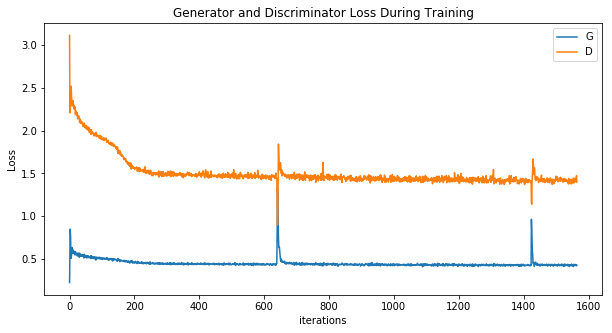

In [101]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 2.5. Evaluate

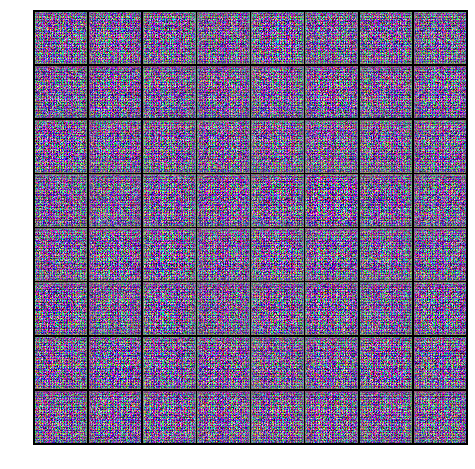

In [102]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

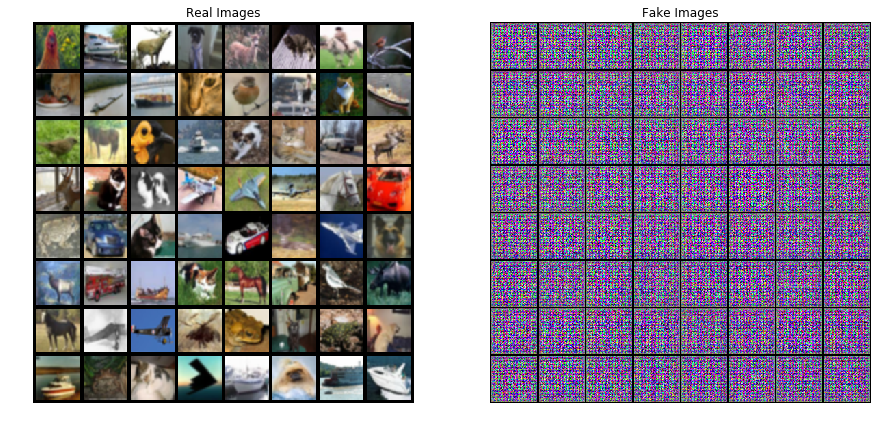

In [106]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(train_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:64], padding=5, normalize=True).cpu(),(1,2,0)))
# plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()